In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from datetime import timedelta

In [50]:
# Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = (pd.read_excel("Predictioneer_Dataset.xlsx"))

In [15]:
type(data)

pandas.core.frame.DataFrame

## EDA

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     4499 non-null   datetime64[ns]
 1   Rainfall_Gallicano                       1640 non-null   float64       
 2   Rainfall_Pontetetto                      1640 non-null   float64       
 3   Rainfall_Monte_Serra                     1640 non-null   float64       
 4   Rainfall_Orentano                        1640 non-null   float64       
 5   Rainfall_Borgo_a_Mozzano                 1640 non-null   float64       
 6   Rainfall_Piaggione                       1275 non-null   float64       
 7   Rainfall_Calavorno                       1640 non-null   float64       
 8   Rainfall_Croce_Arcana                    1640 non-null   float64       
 9   Rainfall_Tereglio_Coreglia_Antelminelli  

In [27]:
data.describe()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
count,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1275.000000,1640.000000,1640.000000,1640.000000,1640.000000,...,4499.000000,4499.000000,4499.000000,2005.000000,2005.000000,2005.000000,2005.0,2005.0,3595.000000,2657.000000
mean,4.626829,3.207561,3.832073,3.041463,4.063659,3.489333,4.325366,2.435000,3.962073,5.673780,...,10.797399,11.223805,15.287586,-11318.977344,-16533.681285,-12457.712250,0.0,0.0,0.327599,0.557478
std,12.669388,8.924921,10.437223,8.450930,10.746631,9.906489,11.633001,7.113501,10.734782,15.314155,...,7.160311,8.467453,7.198651,1158.569648,933.547511,789.824159,0.0,0.0,0.196747,0.487755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.950000,-2.000000,-3.300000,-13883.225810,-18489.600000,-14208.480000,0.0,0.0,0.050000,-0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.950000,2.950000,9.450000,-12097.789940,-17236.800000,-12980.736000,0.0,0.0,0.190000,0.140000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.600000,11.100000,15.250000,-11223.333330,-16492.645160,-12595.392000,0.0,0.0,0.290000,0.600000
75%,1.850000,1.000000,1.400000,0.800000,2.200000,1.200000,2.000000,1.200000,2.000000,3.000000,...,16.650000,18.550000,21.400000,-10419.354840,-15887.858060,-11984.617500,0.0,0.0,0.420000,0.750000
max,137.000000,115.400000,104.000000,91.400000,124.600000,140.800000,127.000000,152.000000,121.800000,172.600000,...,29.500000,30.750000,31.050000,-8692.500000,-14124.783870,-9914.072516,0.0,0.0,2.170000,3.500000


In [22]:
data.shape

(4499, 27)

In [23]:
data.size

121473

In [26]:
data.isnull().sum()

Date                                          0
Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2859
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   2867
Depth_to_Groundwater_SAL                   3480
Depth_to_Groundwater_PAG                   3955
Depth_to_Groundwater_CoS                   3266
Depth_to_Groundwater_DIEC                  4499
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

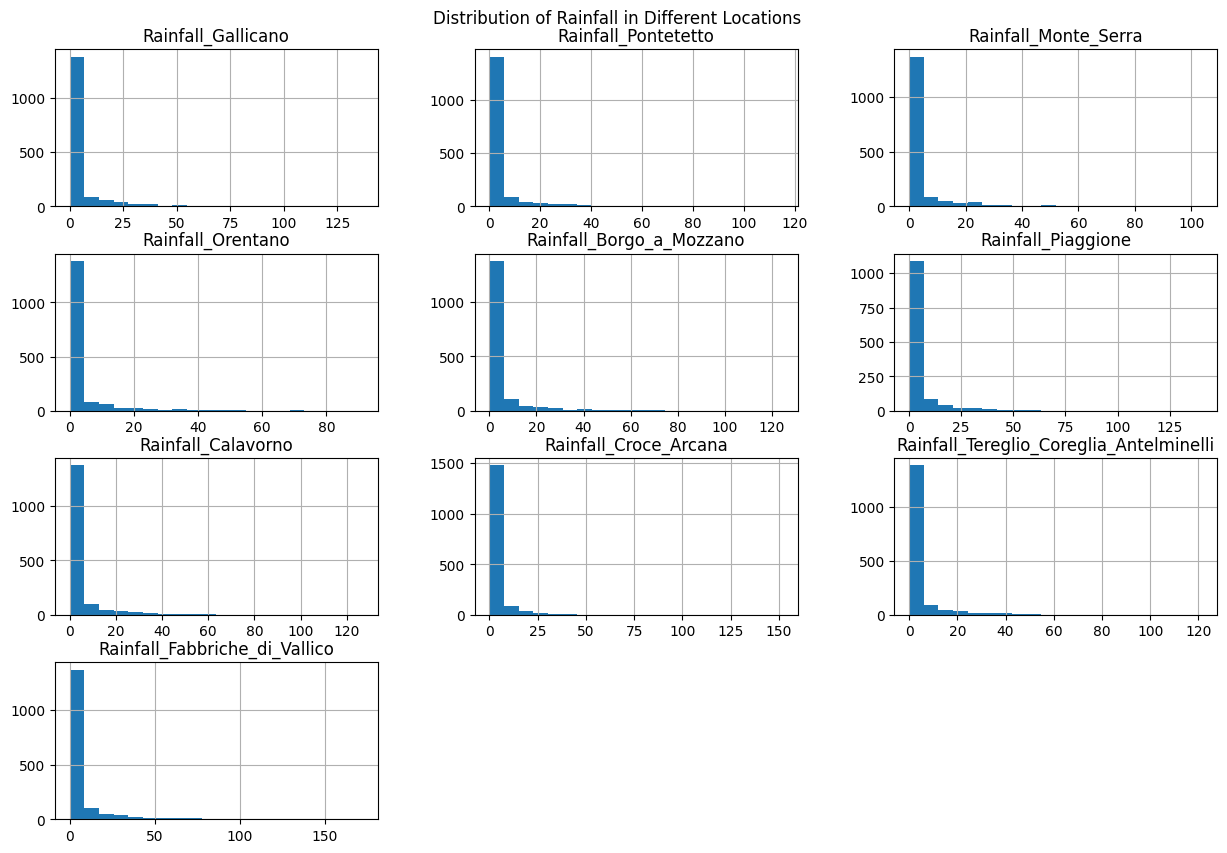

In [48]:
# Distribution of Rainfall in different locations
rainfall_columns = data.columns[1:11]
data[rainfall_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Rainfall in Different Locations', y=0.92)
plt.show()

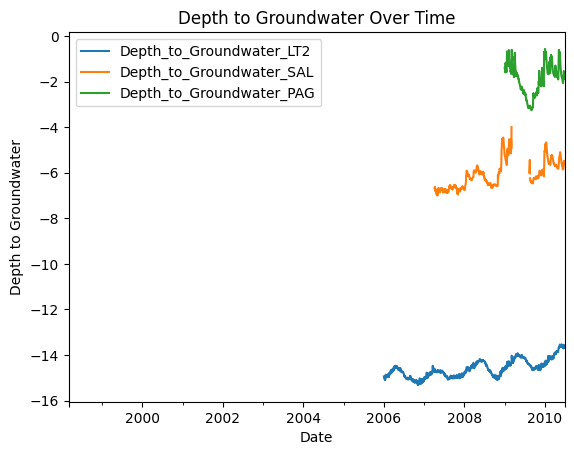

In [46]:
# Depth to Groundwater over time
data.plot(x='Date', y=['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG'])
plt.title('Depth to Groundwater Over Time')
plt.xlabel('Date')
plt.ylabel('Depth to Groundwater')
plt.show()

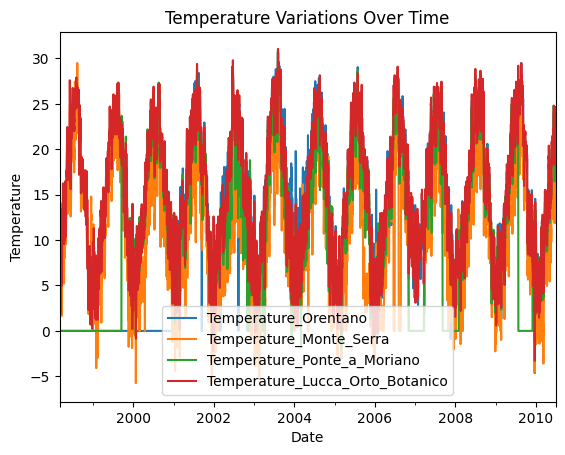

In [45]:
# Temperature variations over time
temperature_columns = data.columns[16:20]
data.plot(x='Date', y=temperature_columns)
plt.title('Temperature Variations Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

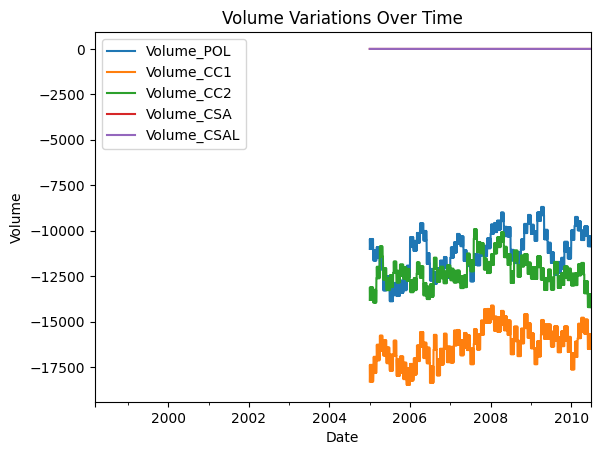

In [44]:
# Volume variations over time
volume_columns = data.columns[20:25]
data.plot(x='Date', y=volume_columns)
plt.title('Volume Variations Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

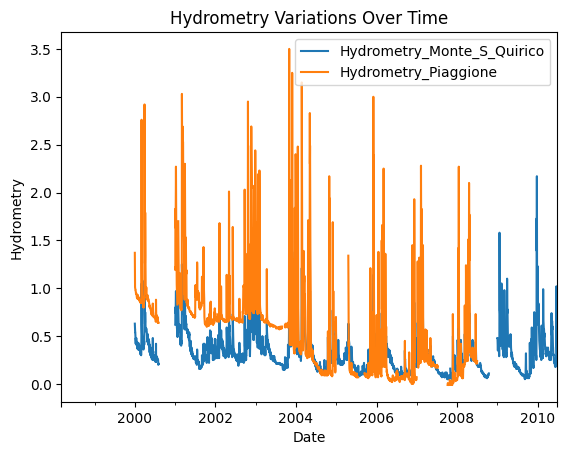

In [43]:
# Hydrometry variations over time
data.plot(x='Date', y=['Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'])
plt.title('Hydrometry Variations Over Time')
plt.xlabel('Date')
plt.ylabel('Hydrometry')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24664\2896806119.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



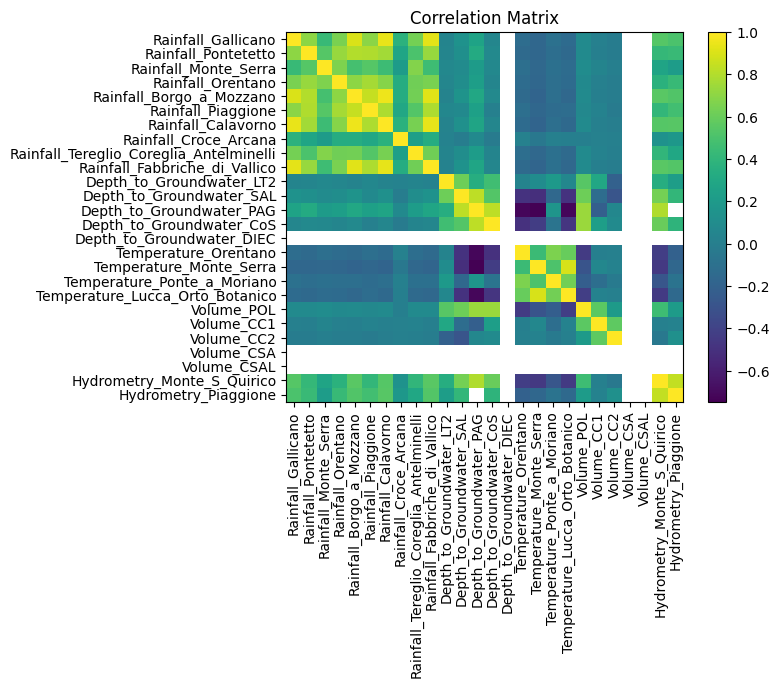

In [42]:
# Correlation matrix to understand relationships between variables
correlation_matrix = data.corr()
plt.figure()
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

## Preprocessing

In [53]:
# Identify features and target variable
north_well = ["Depth_to_Groundwater_SAL", "Depth_to_Groundwater_PAG", "Depth_to_Groundwater_CoS", "Depth_to_Groundwater_DIEC"]
south_well = ["Depth_to_Groundwater_LT2"]

In [54]:
features = data.columns.difference(north_well + south_well)
target = north_well + south_well

In [55]:
# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [56]:
# Create a preprocessing pipeline for missing values and scaling
numeric_features = features.difference(['Date'])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

## Model Training

In [58]:
# Train a Random Forest Regressor using TimeSeriesSplit and perform hyperparameter tuning
tscv = TimeSeriesSplit(n_splits=5)
regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(regressor, param_grid, cv=tscv, scoring='neg_mean_squared_error')
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', grid_search)])

In [59]:
# Train the model
model.fit(train_data[features], train_data[target])

ValueError: 
All the 405 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py", line 1132, in _check_y
    y = check_array(
  File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


In [ ]:
# Evaluate the model on the test set
predictions = model.predict(test_data[features])
mse = mean_squared_error(test_data[target], predictions)
print(f"\nMean Squared Error on Test Set: {mse}")